## Final Project Baseline

### Data Exploration
### Data Cleaning
### Feature preperation
### Feature Selection
### Visualization of selected features
### Models 
##### Logistic
##### Naive Bayes
##### Random Forest (XGBoost)
##### SVM
##### NeuralNet(CNN/RNN)
**This is a classificaiton problem, Linear regression many not  fit**

In [2]:
import pandas
train_data = pandas.read_csv("../input/train.csv",
                   index_col='Id') 
train_data.shape


(15120, 55)

In [3]:
train_data.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

In [4]:
print(train_data.describe())

          Elevation        Aspect         Slope  \
count  15120.000000  15120.000000  15120.000000   
mean    2749.322553    156.676653     16.501587   
std      417.678187    110.085801      8.453927   
min     1863.000000      0.000000      0.000000   
25%     2376.000000     65.000000     10.000000   
50%     2752.000000    126.000000     15.000000   
75%     3104.000000    261.000000     22.000000   
max     3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%            

###### Vertical_Distance_to_hydrology has negative values
###### Soil Type variables seems be only zeros and ones, let us confirm

In [5]:

for i in range(1,40):
    print(train_data.groupby('Soil_Type' + str(i)).size())
    print('\n')

Soil_Type1
0    14765
1      355
dtype: int64


Soil_Type2
0    14497
1      623
dtype: int64


Soil_Type3
0    14158
1      962
dtype: int64


Soil_Type4
0    14277
1      843
dtype: int64


Soil_Type5
0    14955
1      165
dtype: int64


Soil_Type6
0    14470
1      650
dtype: int64


Soil_Type7
0    15120
dtype: int64


Soil_Type8
0    15119
1        1
dtype: int64


Soil_Type9
0    15110
1       10
dtype: int64


Soil_Type10
0    12978
1     2142
dtype: int64


Soil_Type11
0    14714
1      406
dtype: int64


Soil_Type12
0    14893
1      227
dtype: int64


Soil_Type13
0    14644
1      476
dtype: int64


Soil_Type14
0    14951
1      169
dtype: int64


Soil_Type15
0    15120
dtype: int64


Soil_Type16
0    15006
1      114
dtype: int64


Soil_Type17
0    14508
1      612
dtype: int64


Soil_Type18
0    15060
1       60
dtype: int64


Soil_Type19
0    15074
1       46
dtype: int64


Soil_Type20
0    14981
1      139
dtype: int64


Soil_Type21
0    15104
1       16
dtype: int64


So

**All Soil Type variables are binary / one hot encoded. Some soil types like 36 and 28 have very low values of 1's**

In [6]:
# Cover type is our target variable. 
train_data.groupby('Cover_Type').size()

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
dtype: int64

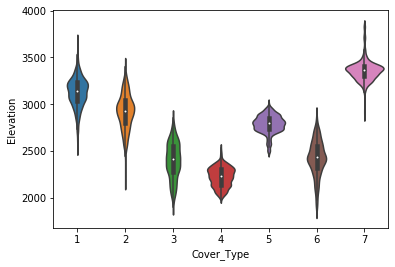

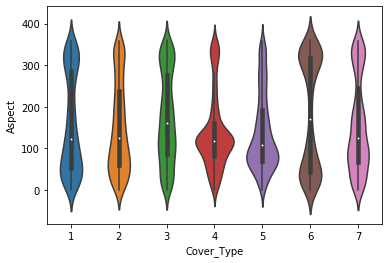

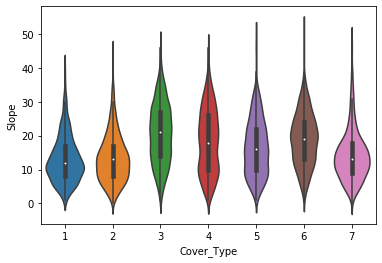

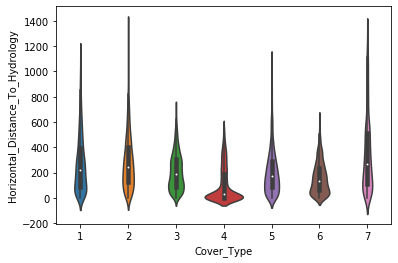

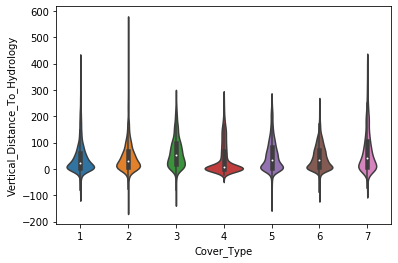

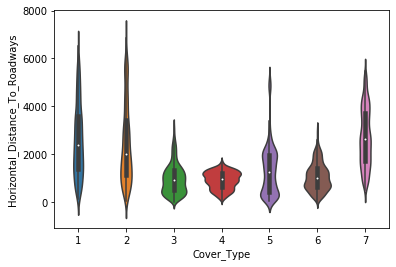

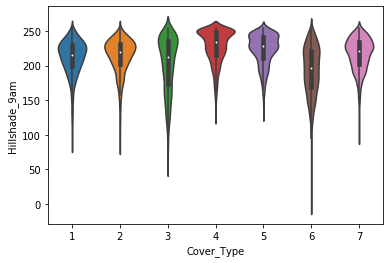

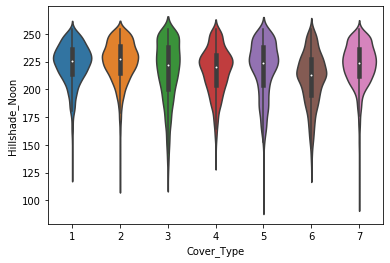

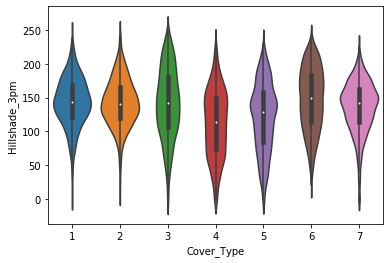

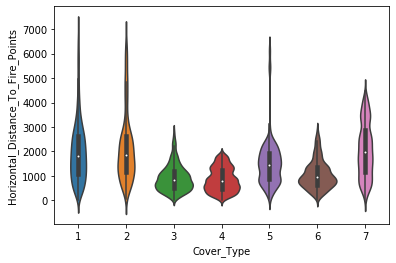

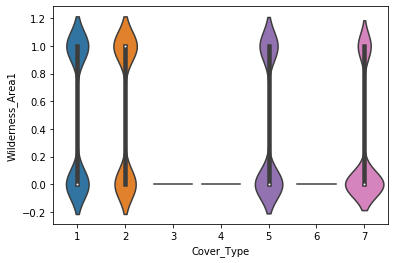

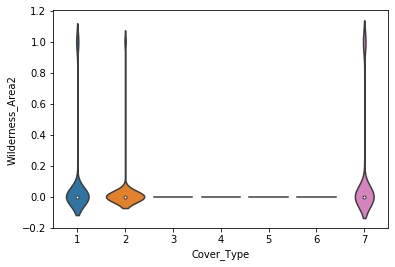

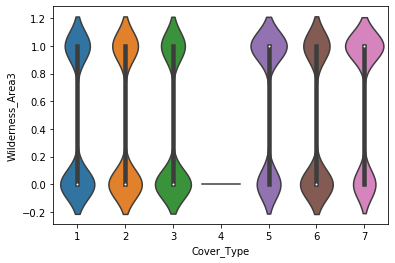

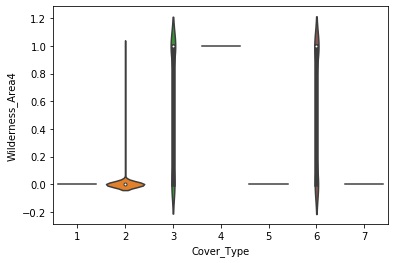

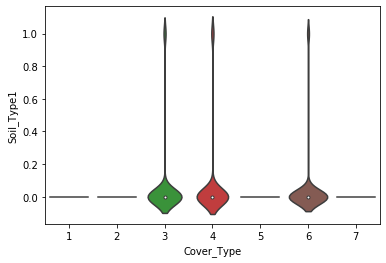

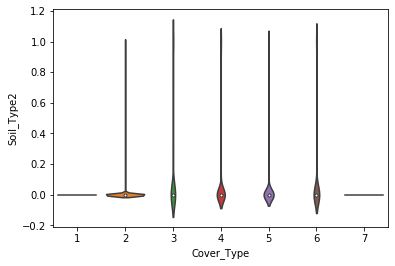

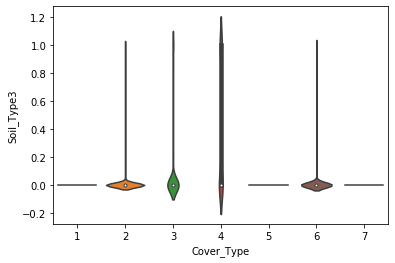

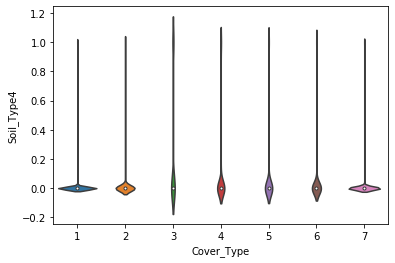

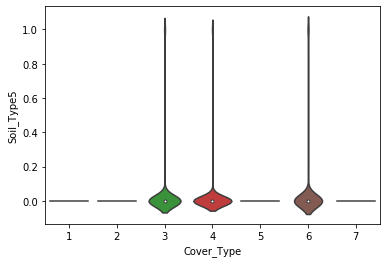

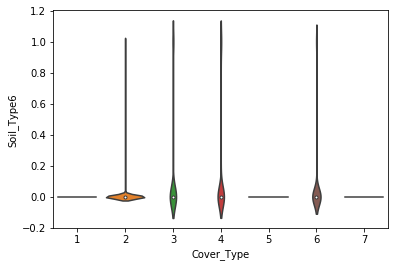

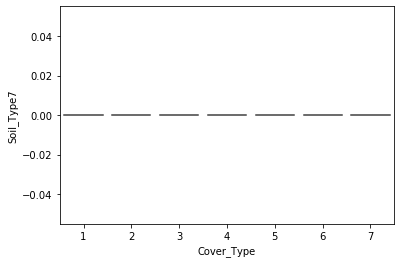

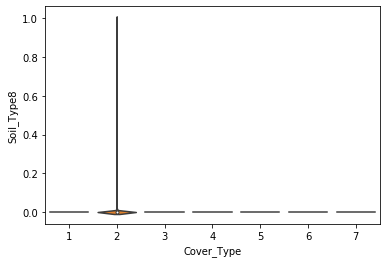

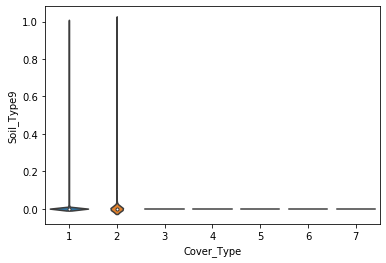

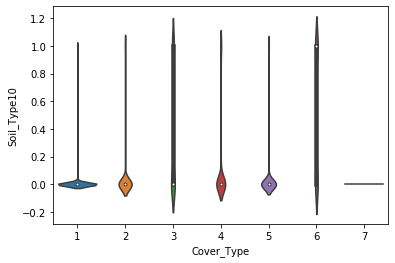

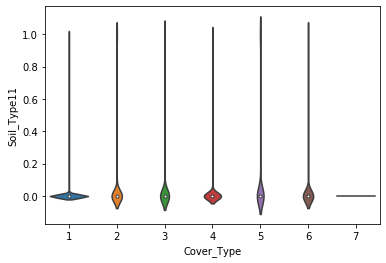

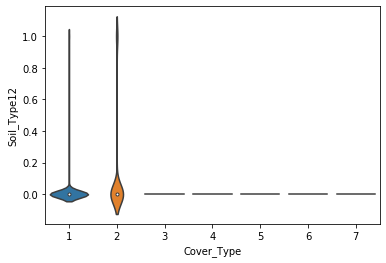

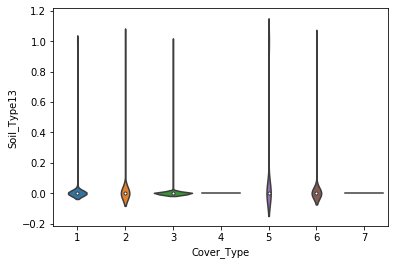

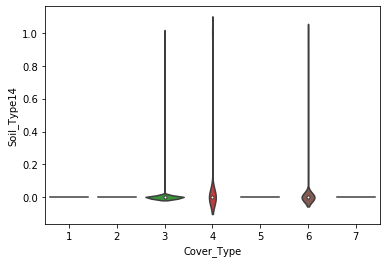

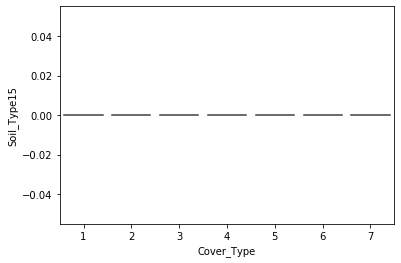

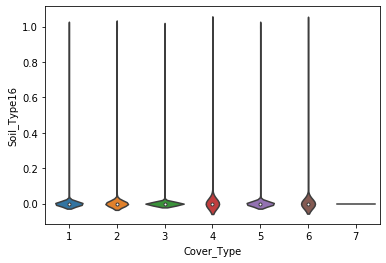

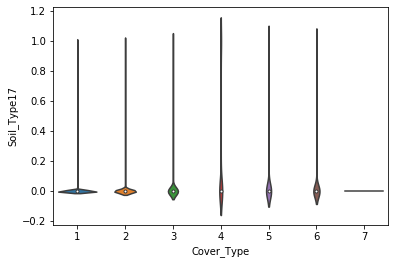

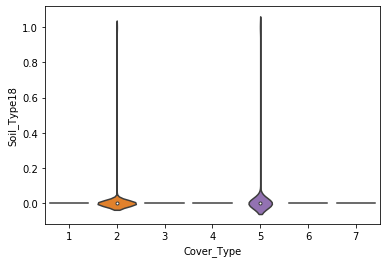

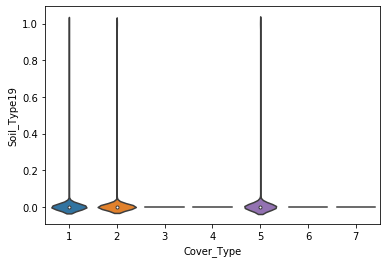

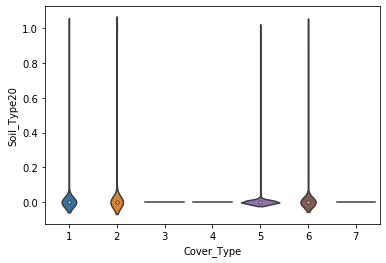

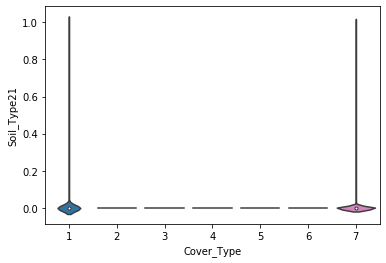

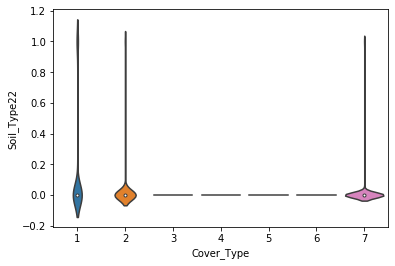

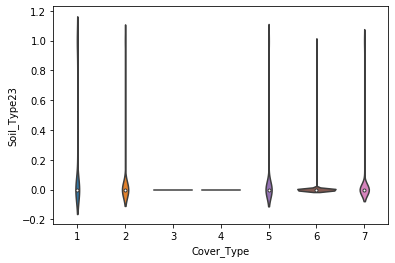

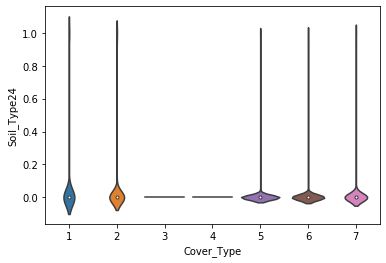

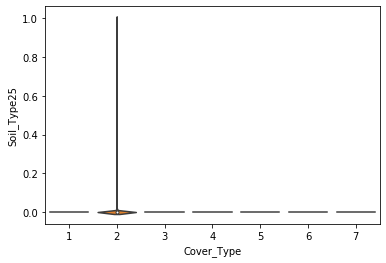

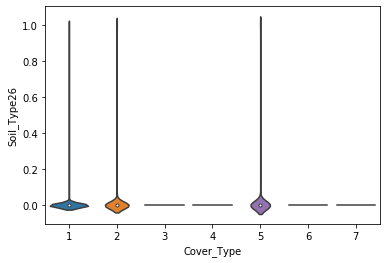

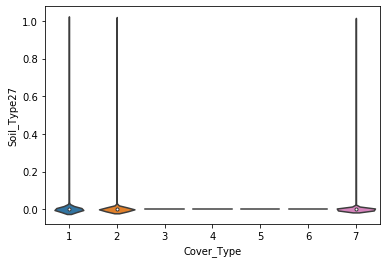

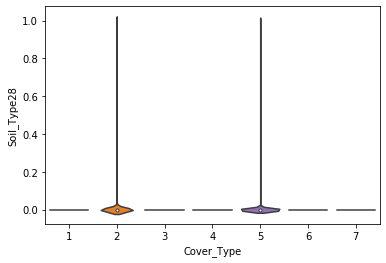

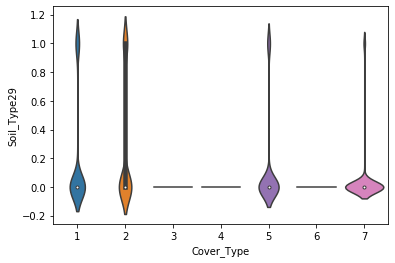

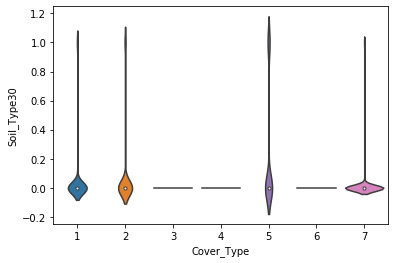

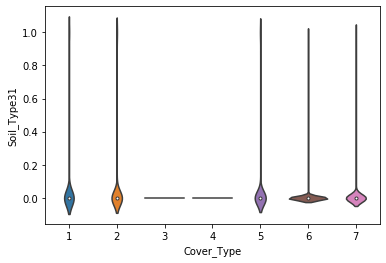

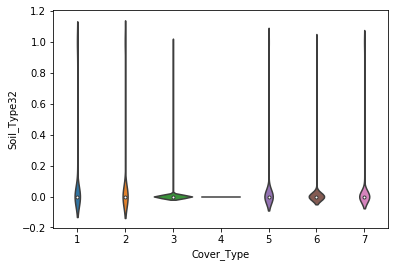

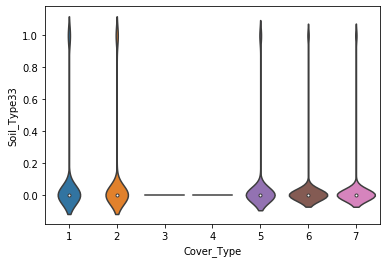

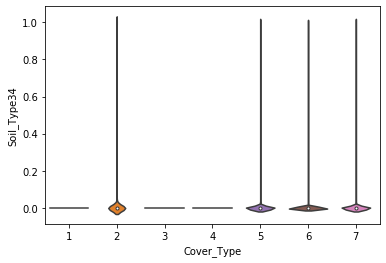

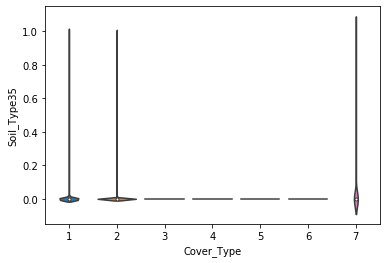

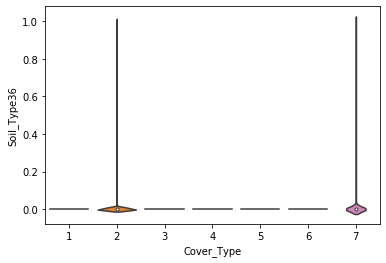

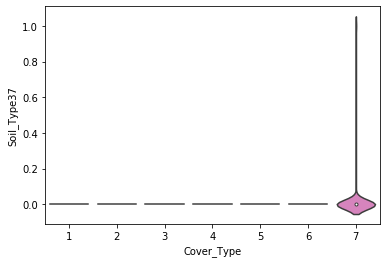

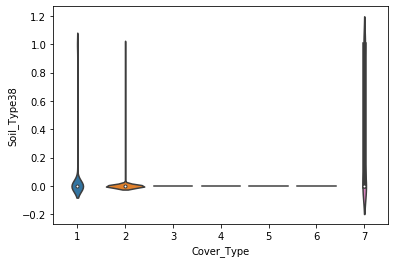

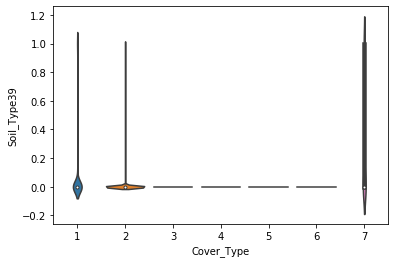

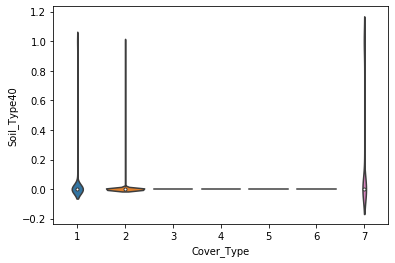

In [7]:
# We will visualize all the attributes using Violin Plot - a combination of box and density plots
%matplotlib inline
#import plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

#names of all the attributes 
cols = train_data.columns

#number of attributes (exclude target)
size = len(cols)-1

#x-axis has target attribute to distinguish between classes
x = cols[size]

#y-axis shows values of an attribute
y = cols[0:size]

#Plot violin for all attributes
for i in range(0,size):
    sns.violinplot(data=train_data,x=x,y=y[i])  
    plt.show()

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import label_binarize

# 70% train, 30% test
lable_classes = classes=[1, 2, 3,4,5,6,7]

y_binarized = label_binarize(train_data['Cover_Type'], lable_classes)

X_train, X_valid, y_train, y_valid = train_test_split(
    train_data.drop('Cover_Type', axis=1), y_binarized,
    test_size=0.3, random_state=17)

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import numpy as np

def ml_pipleline(ml_name, model,X_train, y_train, X_valid, y_valid):
    
    ml_pipe = Pipeline([('scaler', StandardScaler()), 
                       (ml_name, model)]) 
    ml_pipe.fit(X_train, y_train)
    y_valid_predict = ml_pipe.predict(X_valid)

    acc_score = ml_pipe.score(X_valid, y_valid)
    
    print('ML used: ', ml_name, ', accuracy score: ', acc_score)

    cv_scores = cross_val_score(model, X_train, y_train, cv=10)
    print('Cross Validation Scores:', cv_scores)
    print('\n Cross Validation Score', np.mean(cv_scores))
    

    fig = plt.figure(figsize=(12,12))
    plt.tight_layout()
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    lw = 2

    for i in range(len(lable_classes)):
        fpr[i], tpr[i], _ = roc_curve(y_valid[:, i], y_valid_predict[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        sp = fig.add_subplot(3, 3, i+1)
        sp.set_title('cover_class ' + str( lable_classes[i]))
        plt.plot(fpr[i], tpr[i], color='darkorange',
                 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")

    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
    plt.show() 
    

ML used:  KNN with 5 Neighbors , accuracy score:  0.7477954144620811
Cross Validation Scores: [0.75826251 0.7667611  0.7667611  0.75731822 0.77032136 0.7778828
 0.78166352 0.74669187 0.75992439 0.76086957]

 Cross Validation Score 0.7646456424454356


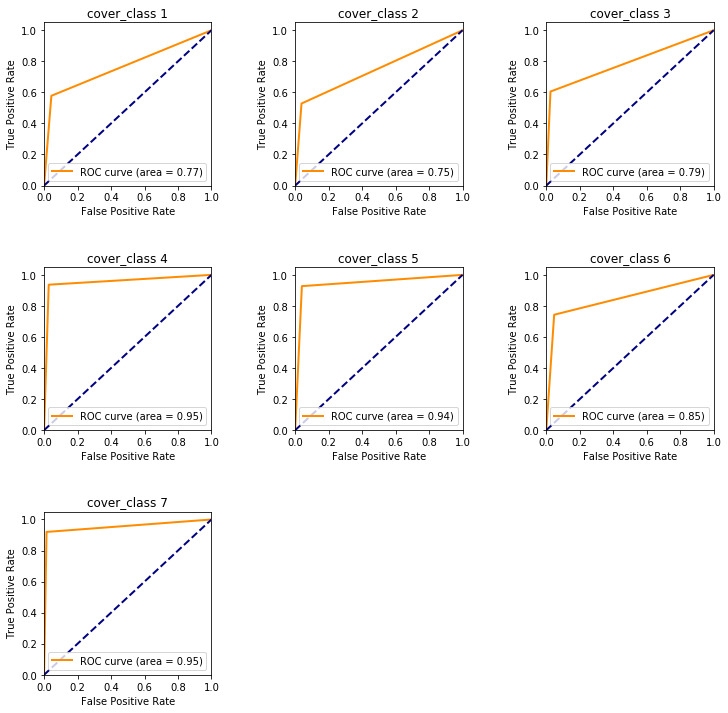

In [76]:
# KNN Neighborhood
knn_classifier = KNeighborsClassifier(n_neighbors=5)
ml_pipleline('KNN with 5 Neighbors', knn_classifier, X_train, y_train, X_valid, y_valid )
                       

In [15]:
# Logistic regression
# AS this is a multi class problem, we have to use lbfgs
# Assuming, most of the machines have 4 cores now.
logit = LogisticRegression(C=1, solver='lbfgs', max_iter=500,
                           random_state=17, n_jobs=4,
                          multi_class='multinomial')
ml_pipleline('Logistic with max_iterations=500 ', logit, X_train, y_train, X_valid, y_valid )
                       


ML used:  Logistic with max_iterations=500  , accuracy score:  0.7067901234567902


**Should we Evaluate OneVsRestClassifier?**